In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [114]:
# import dataset Titanic
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [115]:
# Short information about DataFrame columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [116]:
# Description about numerical columns 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [117]:
# List of columns of DataFrame
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [118]:
# Number of missed values(NaN) in each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [119]:
# In any case, we start analyzing DataFrame by getting rid of duplicates
df = df.drop_duplicates()

In [120]:
# Number of people who survived and didn't 
print("The number of people, who survived: ", end = "")
print((df["Survived"] == 1).sum())

print("The number of people, who didn't survived: ", end = "")
print((df["Survived"] == 0).sum())

The number of people, who survived: 342
The number of people, who didn't survived: 549


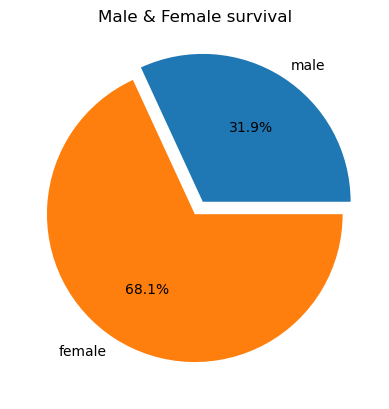

In [121]:
# Percentage of male and female survival
male = ((df["Sex"] == "male") & (df["Survived"] == 1)).sum()
female = ((df["Sex"] == "female") & (df["Survived"] == 1)).sum()
myexplode = [0.1, 0]

plt.pie([male, female], labels = ["male", "female"], autopct='%1.1f%%', explode = myexplode)
plt.title("Male & Female survival")
plt.show()


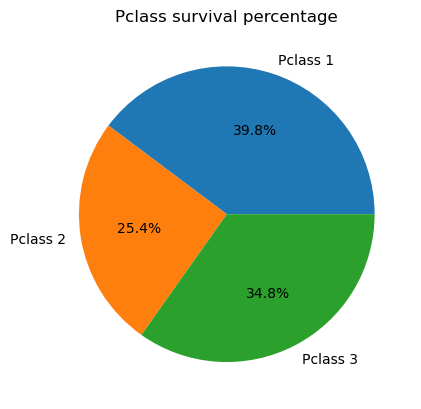

In [122]:
# The influence of class on survival
first_Pclass = ((df["Pclass"] == 1) & (df["Survived"] == 1)).sum()
second_Pclass = ((df["Pclass"] == 2) & (df["Survived"] == 1)).sum()
third_Pclass = ((df["Pclass"] == 3) & (df["Survived"] == 1)).sum()

plt.pie([first_Pclass, second_Pclass, third_Pclass], labels=["Pclass 1", "Pclass 2", "Pclass 3"], autopct='%1.1f%%')
plt.title("Pclass survival percentage")
plt.show()

In [123]:
# Replacing NaN values in Age column by 0
df = df.fillna({"Age" : 0})

# Now we have only numerical values in Age column, so we can change dtype to int
df = df.astype({"Age" : "int64"})
df[df.Age == 0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,0,0,0,330959,7.8792,NaN,Q


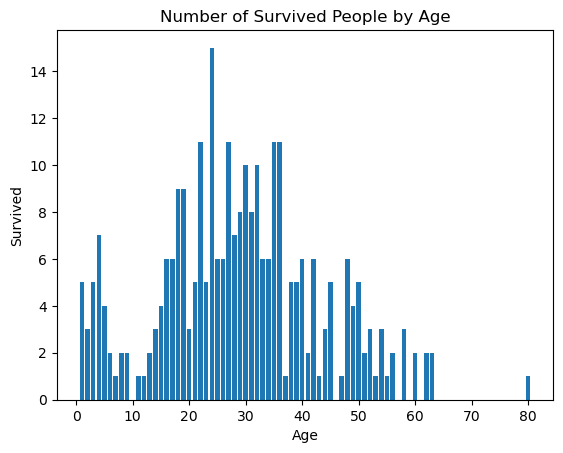

In [134]:
# Number of Survived People by Age
df2 = df.copy()
df2 = df2[df2["Survived"] == 1].groupby("Age")["Survived"].count().reset_index(name='Survived_Count')

ages = np.array(df2["Age"])
count = np.array(df2["Survived_Count"])

plt.bar(ages, count)
plt.title('Number of Survived People by Age')
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

In [125]:
# splitting Names to first name and last name
names = df["Name"].str.split(",", expand = True)
names[[1, 2, 3]] = names[1].str.split("(", expand = True)
names = names.drop([2, 3], axis = 1)
df[["First_Name", "Last_Name"]] = names

# Now we can remove the column "Name"
df = df.drop(["Name"], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_Name,Last_Name
0,1,0,3,male,22,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath
4,5,0,3,male,35,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [126]:
# I want to change the order of columns
df = df[["PassengerId", "Survived", "Pclass", "First_Name", "Last_Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]]
df.head()

,PassengerId,Survived,Pclass,First_Name,Last_Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley,female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath,female,35,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35,0,0,373450,8.0500,NaN,S


In [127]:
# Categorize Age column to groups
df = df[df["Age"] != 0]

def group_by_age(x):
    if 0 < x < 18:
        return "young"
    elif 19 <= x <= 35:
        return "middle"
    elif 36 <= x <= 60:
        return "aged"
    else:
        return "old"

# Apply the function to the "Age" column
df["Age_Group"] = df["Age"].apply(group_by_age)
df.head()

,PassengerId,Survived,Pclass,First_Name,Last_Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,Braund,Mr. Owen Harris,male,22,1,0,A/5 21171,7.2500,NaN,S,middle
1,2,1,1,Cumings,Mrs. John Bradley,female,38,1,0,PC 17599,71.2833,C85,C,aged
2,3,1,3,Heikkinen,Miss. Laina,female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,middle
3,4,1,1,Futrelle,Mrs. Jacques Heath,female,35,1,0,113803,53.1000,C123,S,middle
4,5,0,3,Allen,Mr. William Henry,male,35,0,0,373450,8.0500,NaN,S,middle


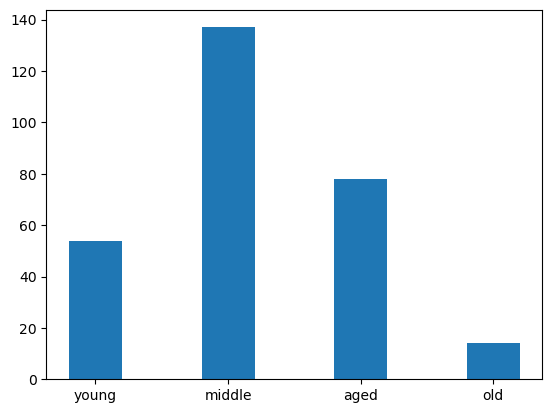

In [128]:
# Survived people by Age group
young = ((df["Age_Group"] == "young") & (df["Survived"] == 1)).sum()
middle = ((df["Age_Group"] == "middle") & (df["Survived"] == 1)).sum()
aged = ((df["Age_Group"] == "aged") & (df["Survived"] == 1)).sum()
old = ((df["Age_Group"] == "old") & (df["Survived"] == 1)).sum()

age_groups = ["young", "middle", "aged", "old"]

plt.bar(age_groups, [young, middle, aged, old], width = 0.4)
plt.show()

In [129]:
# Using ffill() method to clean "Embarked" column
df["Embarked"] = df["Embarked"].ffill()

In [130]:
# I want to split "Ticket column into "Ticket_Index" and "Ticket_Number"
# Function gets column's row and returns ticket number
def get_number(row):
    if len(row.split(" ")) == 2:
        return row.split(" ")[1]
    else:
        return row

# Function gets column's row and returns ticket index
def get_index(row):
    if len(row.split(" ")) == 2:
        return row.split(" ")[0]
    else:
        return "0"
    
Ticket_Index = df["Ticket"].apply(get_index)    
Ticket_Number = df["Ticket"].apply(get_number)


df["Ticket_Index"] = Ticket_Index
df["Ticket_Number"] = Ticket_Number

df = df.drop(["Ticket"], axis = 1)
df.head()

,PassengerId,Survived,Pclass,First_Name,Last_Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Group,Ticket_Index,Ticket_Number
0,1,0,3,Braund,Mr. Owen Harris,male,22,1,0,7.2500,NaN,S,middle,A/5,21171
1,2,1,1,Cumings,Mrs. John Bradley,female,38,1,0,71.2833,C85,C,aged,PC,17599
2,3,1,3,Heikkinen,Miss. Laina,female,26,0,0,7.9250,NaN,S,middle,STON/O2.,3101282
3,4,1,1,Futrelle,Mrs. Jacques Heath,female,35,1,0,53.1000,C123,S,middle,0,113803
4,5,0,3,Allen,Mr. William Henry,male,35,0,0,8.0500,NaN,S,middle,0,373450


In [131]:
# Let's remove missed values in "Cabin column"
df["Cabin"] = df["Cabin"].fillna("Unknown")
df.head()

,PassengerId,Survived,Pclass,First_Name,Last_Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Group,Ticket_Index,Ticket_Number
0,1,0,3,Braund,Mr. Owen Harris,male,22,1,0,7.2500,Unknown,S,middle,A/5,21171
1,2,1,1,Cumings,Mrs. John Bradley,female,38,1,0,71.2833,C85,C,aged,PC,17599
2,3,1,3,Heikkinen,Miss. Laina,female,26,0,0,7.9250,Unknown,S,middle,STON/O2.,3101282
3,4,1,1,Futrelle,Mrs. Jacques Heath,female,35,1,0,53.1000,C123,S,middle,0,113803
4,5,0,3,Allen,Mr. William Henry,male,35,0,0,8.0500,Unknown,S,middle,0,373450


In [132]:
# Now there's no missed value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
First_Name       0
Last_Name        0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin            0
Embarked         0
Age_Group        0
Ticket_Index     0
Ticket_Number    0
dtype: int64